# IU 4.6 - Machine Learning Classification modelling

### 	The dataset is about car evaluation, features about car and a final decision of acceptance is captured here

We are required to select important features, split data into train and test, create a RandomForest classification model and get the evaluation metrics

#### Import packages

In [1]:
# import all required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read datasets

In [2]:
# read the dataset
df = pd.read_csv("./Data/car_evaluation.csv")

# print the shape of dataset
print(df.shape)

# print the top rows of data
df.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
# summarize dataset using describe method
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,2
top,high,high,4,4,small,high,unacc
freq,432,432,432,576,576,576,1210


In [5]:
# explore the outcome variable "class"
df["class"].value_counts()

unacc    1210
acc       518
Name: class, dtype: int64

#### Declare feature vector and target variable into variables X and y

In [6]:
# drop column 'class' from df and assign df to X (use axis=1)


# assign 'class' column from df to variable y


#### Split data into separate training and test set

In [7]:
# split data into training and testing sets
# import required library


# use the function to make the split


In [8]:
# print the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

#### Feature Engineering

In [9]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [10]:
# encode categorical variables
# import category encoders
try:
    import category_encoders as ce
except:
    !pip install category_encoders
    import category_encoders as ce

# encode categorical variable with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

# fit and transform using fit_transform on the encoder object using X_train data
# assign it back to X_train
X_train = encoder.fit_transform(X_train)

# use encoder.transform on X_test and assign it to X_test
X_test = encoder.transform(X_test)

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [11]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [12]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


#### RandomForest classifier model with default parameters

In [13]:
# import RandomFroest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier into variable rfc


# fit the model


# predict the test set results


# import accuracy score
from sklearn.metrics import accuracy_score

# check accuracy score and print it


Model acuracy score with 100 decision-trees : 0.9825


#### RandomForest classifier model with parameter n_estimators=200

In [14]:
# instantiate the classifier with n_estimators = 200



# fit the model to the training set



# Predict on the test set results



# Check accuracy score 


Model accuracy score with 200 decision-trees : 0.9807


#### Find important featuers with RandomForest model

In [15]:
# create the classifier with n_estimators = 100


# fit the model to the training set


RandomForestClassifier(random_state=0)

In [16]:
# view the feature scores
# create a pandas series using the clf.featuer_importances_
# assign index using column names
# sort values by descending


# print the feature_scores


safety      0.332698
persons     0.293187
buying      0.128798
maint       0.115616
lug_boot    0.072239
doors       0.057461
dtype: float64

#### Visualize feature scores of the features

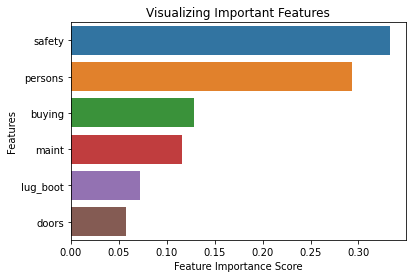

In [17]:
# Creating a seaborn bar plot


# Add labels to the graph



# Add title to the graph



# Visualize the graph
plt.show()

#### Build RandomForest model on selected features

In [18]:
# declare feature vector and target variable
# drop columns class and doors from df and assign it to X (use axis=1)

# assign 'class' column to y


In [19]:
# split data into training and testing sets


# assign the output of train_test_split of X and y to X_train, X_test, y_train, y_test
# use test_size = 0.33
# use random_state=42


In [20]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

# fit and transform using fit_transform on the encoder object using X_train data
# assign it back to X_train
X_train = encoder.fit_transform(X_train)

# use encoder.transform on X_test and assign it to X_test
X_test = encoder.transform(X_test)

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [21]:
# instantiate the classifier with n_estimators = 100


# fit the model to the training set


# Predict on the test set results


# Check accuracy score 


Model accuracy score with doors variable removed : 0.9685


#### confusion matrix

In [22]:
# Print the Confusion Matrix and slice it into four pieces


# use confusion_matrix function and store results in a variable cm


# print the confusion matrix


Confusion matrix

 [[166   8]
 [ 10 387]]


#### Classification report

In [23]:
# import classification_report 


# print the classification_report for y_test and y_pred


              precision    recall  f1-score   support

         acc       0.94      0.95      0.95       174
       unacc       0.98      0.97      0.98       397

    accuracy                           0.97       571
   macro avg       0.96      0.96      0.96       571
weighted avg       0.97      0.97      0.97       571

